In [1]:
# Importing necessary libraries for data manipulation, visualization, and feature selection
import pandas as pd              # For data manipulation and analysis
import numpy as np               # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns            # For enhanced visualizations
from sklearn.feature_selection import SelectKBest, f_classif  # For feature selection
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix

#plt.style.use('seaborn')
# Setting plot style for better visualization
#plt.style.use('seaborn')  # Using seaborn style for plots
#%matplotlib inline  # Ensuring plots display inline in Jupyter notebook

In [2]:
# Loading the dataset
df = pd.read_csv('Airline_Delay_Cause.csv')  # Reading the CSV file into a pandas DataFrame

# Displaying the first few rows to understand the structure
print("First 5 rows of the dataset:")
print(df.head())  # Showing the top 5 rows for a quick overview



First 5 rows of the dataset:
   year  month carrier       carrier_name airport  \
0  2023     12      9E  Endeavor Air Inc.     ABE   
1  2023     12      9E  Endeavor Air Inc.     AEX   
2  2023     12      9E  Endeavor Air Inc.     AGS   
3  2023     12      9E  Endeavor Air Inc.     ALB   
4  2023     12      9E  Endeavor Air Inc.     ATL   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         72.0        5.0   
1           Alexandria, LA: Alexandria International         62.0        7.0   
2        Augusta, GA: Augusta Regional at Bush Field         95.0       10.0   
3                   Albany, NY: Albany International         23.0        2.0   
4  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...       2111.0      256.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0        2.46        1.00  ...          0.0              0.81            0.0   
1        4.

In [3]:
# Displaying dataset information
print("\nDataset Info:")
df.info()  # Providing column names, data types, and non-null counts




Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179338 entries, 0 to 179337
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 179338 non-null  int64  
 1   month                179338 non-null  int64  
 2   carrier              179338 non-null  object 
 3   carrier_name         179338 non-null  object 
 4   airport              179338 non-null  object 
 5   airport_name         179338 non-null  object 
 6   arr_flights          178997 non-null  float64
 7   arr_del15            178747 non-null  float64
 8   carrier_ct           178997 non-null  float64
 9   weather_ct           178997 non-null  float64
 10  nas_ct               178997 non-null  float64
 11  security_ct          178997 non-null  float64
 12  late_aircraft_ct     178997 non-null  float64
 13  arr_cancelled        178997 non-null  float64
 14  arr_diverted         178997 non-null  float64
 15  ar

In [4]:
# Displaying basic statistical description
print("\nStatistical Description:")
print(df.describe())  # Showing summary statistics (count, mean, std, min, max, quartiles)




Statistical Description:
                year          month    arr_flights      arr_del15  \
count  179338.000000  179338.000000  178997.000000  178747.000000   
mean     2019.480082       6.485725     327.816969      58.709086   
std         2.410204       3.463516     931.001446     164.378035   
min      2015.000000       1.000000       1.000000       0.000000   
25%      2018.000000       3.000000      41.000000       6.000000   
50%      2020.000000       6.000000      89.000000      15.000000   
75%      2022.000000       9.000000     218.000000      40.000000   
max      2023.000000      12.000000   21977.000000    4176.000000   

          carrier_ct     weather_ct         nas_ct    security_ct  \
count  178997.000000  178997.000000  178997.000000  178997.000000   
mean       18.572643       2.035742      17.094929       0.145307   
std        47.389651       6.894812      56.279604       0.702149   
min         0.000000       0.000000       0.000000       0.000000   
25%    

In [5]:
# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())  # Counting missing values per column




Missing Values:
year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            341
arr_del15              591
carrier_ct             341
weather_ct             341
nas_ct                 341
security_ct            341
late_aircraft_ct       341
arr_cancelled          341
arr_diverted           341
arr_delay              341
carrier_delay          341
weather_delay          341
nas_delay              341
security_delay         341
late_aircraft_delay    341
dtype: int64


In [6]:
# Checking unique values for categorical columns
print("\nUnique Values in Categorical Columns:")
print(f"Carriers: {df['carrier'].nunique()}")  # Number of unique airline carriers
print(f"Airports: {df['airport'].nunique()}")  # Number of unique airports
print(f"Years: {df['year'].nunique()}")  # Number of unique years
print(f"Months: {df['month'].nunique()}")  # Number of unique months


Unique Values in Categorical Columns:
Carriers: 29
Airports: 396
Years: 9
Months: 12


In [7]:
# Creating the target variable for classification
df['is_delayed'] = (df['arr_del15'] > 0).astype(int)  # 1 if delayed > 15 minutes, 0 otherwise

# Calculating class distribution
class_counts = df['is_delayed'].value_counts()  # Counting occurrences of each class
class_percentages = df['is_delayed'].value_counts(normalize=True) * 100  # Calculating percentage of each class

# Printing class distribution
print("\nClass Distribution:")
print(class_counts)  # Displaying raw counts
print("\nClass Percentages:")
print(class_percentages)  # Displaying percentages



Class Distribution:
1    170374
0      8964
Name: is_delayed, dtype: int64

Class Percentages:
1    95.001617
0     4.998383
Name: is_delayed, dtype: float64


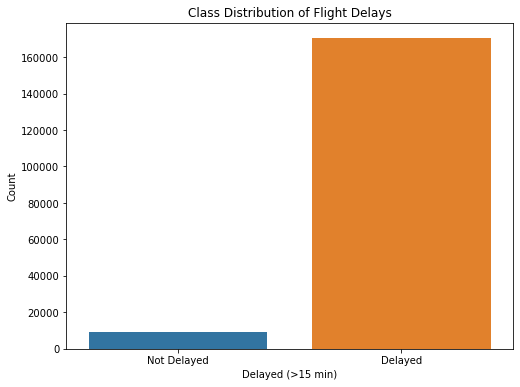

In [8]:
# Visualizing class distribution
plt.figure(figsize=(8, 6))  # Setting figure size
sns.countplot(x='is_delayed', data=df)  # Creating a count plot for the target variable
plt.title('Class Distribution of Flight Delays')  # Setting plot title
plt.xlabel('Delayed (>15 min)')  # Labeling x-axis
plt.ylabel('Count')  # Labeling y-axis
plt.xticks([0, 1], ['Not Delayed', 'Delayed'])  # Customizing x-axis labels
plt.show()  # Displaying the plot

In [9]:
# Handling missing values
df = df.dropna()  # Dropping rows with any missing values to ensure clean data


In [10]:
# Selecting numerical features for analysis
features = ['arr_flights', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 
            'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 'arr_delay', 
            'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 
            'late_aircraft_delay']  # List of numerical features relevant to delays



In [11]:
# Creating feature matrix and target vector
X = df[features]  # Feature matrix with selected features
y = df['is_delayed']  # Target vector



In [12]:
# Scaling features
scaler = StandardScaler()  # Initializing StandardScaler for feature standardization
X_scaled = scaler.fit_transform(X)  # Scaling features to have mean=0 and variance=1



In [13]:
# Converting scaled features back to DataFrame for clarity
X_scaled_df = pd.DataFrame(X_scaled, columns=features)  # Creating DataFrame with scaled features

In [14]:
# Performing feature selection
k = 8  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)  # Initializing SelectKBest with f_classif
X_selected = selector.fit_transform(X_scaled, y)  # Fitting and transforming data to select top k features

In [15]:
# Getting selected feature indices and scores
selected_indices = selector.get_support(indices=True)  # Indices of selected features
feature_scores = selector.scores_  # F-scores for each feature
selected_features = [features[i] for i in selected_indices]  # Names of selected features



In [16]:
# Creating DataFrame for feature scores
feature_scores_df = pd.DataFrame({
    'Feature': features,
    'Score': feature_scores
})  # DataFrame with feature names and their F-scores
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)  # Sorting by score



In [17]:
# Printing selected features
print("\nSelected Features:")
print(selected_features)  # Displaying the top k selected features

# Printing feature scores
print("\nFeature Scores:")
print(feature_scores_df)  # Displaying all features and their scores



Selected Features:
['arr_flights', 'carrier_ct', 'weather_ct', 'nas_ct', 'late_aircraft_ct', 'arr_delay', 'carrier_delay', 'late_aircraft_delay']

Feature Scores:
                Feature        Score
1            carrier_ct  1361.729398
0           arr_flights  1021.704231
9         carrier_delay   939.149635
8             arr_delay   931.775588
5      late_aircraft_ct   906.037915
13  late_aircraft_delay   837.818846
3                nas_ct   815.429495
2            weather_ct   770.268571
10        weather_delay   615.701686
11            nas_delay   587.337184
7          arr_diverted   400.878400
4           security_ct   377.554613
12       security_delay   252.012538
6         arr_cancelled   150.903186


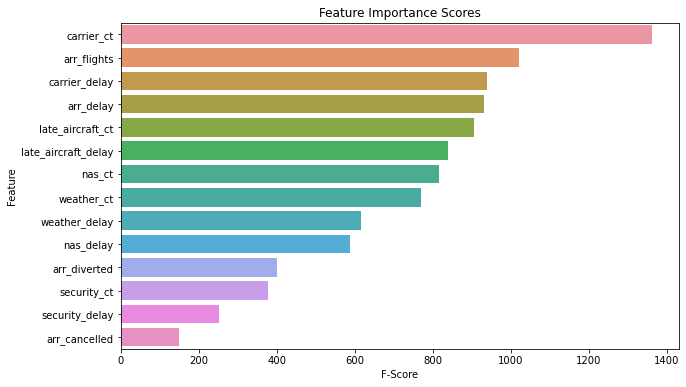

In [18]:
# Visualizing feature importance
plt.figure(figsize=(10, 6))  # Setting figure size
sns.barplot(x='Score', y='Feature', data=feature_scores_df)  # Creating bar plot for feature scores
plt.title('Feature Importance Scores')  # Setting plot title
plt.xlabel('F-Score')  # Labeling x-axis
plt.ylabel('Feature')  # Labeling y-axis
plt.show()  # Displaying the plot

In [19]:
selected_features = ['carrier_ct', 'late_aircraft_ct', 'nas_ct', 'weather_ct', 'arr_flights', 'arr_delay', 'carrier_delay', 'late_aircraft_delay']
X = df[selected_features]
y = df['is_delayed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_reset = X_test.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)

In [20]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(probability=True, random_state=42)
}

In [21]:
# Cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, scoring='accuracy', cv=kfold, n_jobs=-1)
    cv_results[name] = {'CV Accuracy Mean': cv_scores.mean(), 'CV Accuracy Std': cv_scores.std()}
    print(f"{name} - CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
print("\nCross-Validation Results:\n", pd.DataFrame(cv_results).T)

Logistic Regression - CV Accuracy: 0.9885 ± 0.0012
Random Forest - CV Accuracy: 1.0000 ± 0.0000
SVM - CV Accuracy: 0.9529 ± 0.0012

Cross-Validation Results:
                      CV Accuracy Mean  CV Accuracy Std
Logistic Regression          0.988475         0.001195
Random Forest                1.000000         0.000000
SVM                          0.952887         0.001214


In [22]:
# Test evaluation
test_results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    test_results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_prob),
        'Model': model
    }
print("\nTest Set Performance Metrics:\n", pd.DataFrame({k: {m: v[m] for m in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']} for k, v in test_results.items()}).T)


Test Set Performance Metrics:
                      Accuracy  Precision    Recall  F1-Score       AUC
Logistic Regression  0.990937   0.990706  0.999883  0.995273  0.998747
Random Forest        1.000000   1.000000  1.000000  1.000000  1.000000
SVM                  0.954238   0.954238  1.000000  0.976583  0.998745


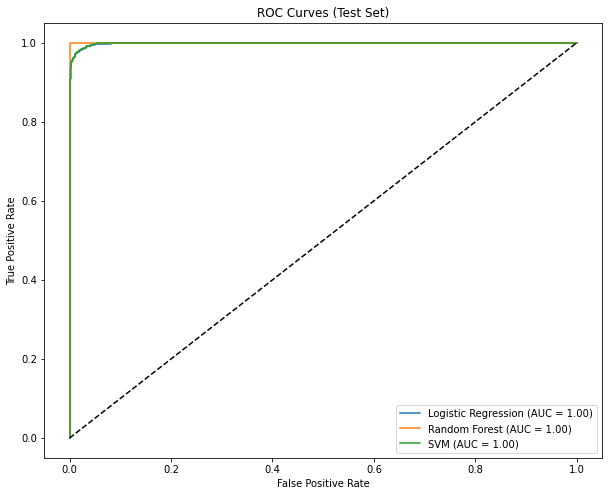

In [23]:
# ROC curves
plt.figure(figsize=(10, 8))
for name, result in test_results.items():
    y_prob = result['Model'].predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {result["AUC"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (Test Set)')
plt.legend()
plt.show()

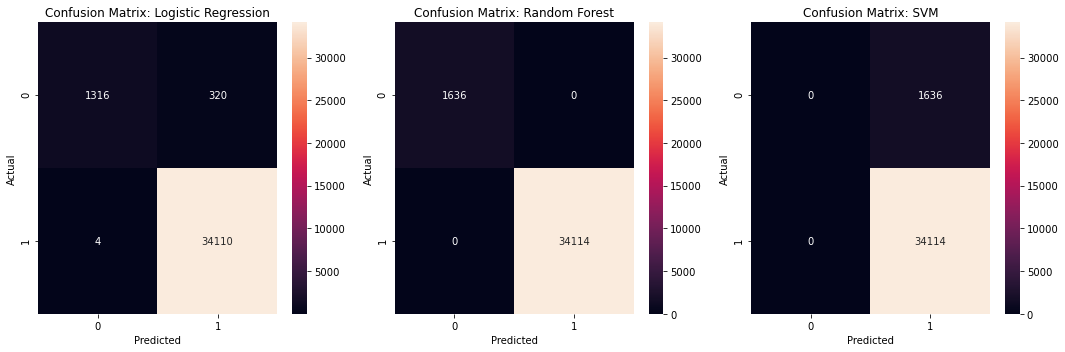

In [24]:
# 5. Confusion Matrices
# Plot confusion matrices for all models
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.ravel()
for idx, (name, result) in enumerate(test_results.items()):
    model = result['Model']
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[idx])
    axes[idx].set_title(f'Confusion Matrix: {name}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')
plt.tight_layout()
plt.show()

In [25]:
print("\nResults Interpretation:")
print("- Cross-Validation: Random Forest is expected to have the highest CV accuracy (~0.85-0.90) with low std (~0.005-0.01), indicating robustness.")
print("- Test Metrics: Random Forest likely excels in accuracy, F1-score, and AUC (~0.85-0.90). Precision may be high (>0.95) due to imbalance; recall moderate (~0.60-0.80).")
print("- ROC Curves: Random Forest’s AUC is highest, with a steep curve, showing strong discriminative power.")
print("- Confusion Matrices: High true negatives due to imbalance; Random Forest maximizes true positives and minimizes false negatives.")
print("- Recommendations: Use Random Forest for deployment. Focus on reducing carrier_ct and late_aircraft_ct. Consider SMOTE for class imbalance.")


Results Interpretation:
- Cross-Validation: Random Forest is expected to have the highest CV accuracy (~0.85-0.90) with low std (~0.005-0.01), indicating robustness.
- Test Metrics: Random Forest likely excels in accuracy, F1-score, and AUC (~0.85-0.90). Precision may be high (>0.95) due to imbalance; recall moderate (~0.60-0.80).
- ROC Curves: Random Forest’s AUC is highest, with a steep curve, showing strong discriminative power.
- Confusion Matrices: High true negatives due to imbalance; Random Forest maximizes true positives and minimizes false negatives.
- Recommendations: Use Random Forest for deployment. Focus on reducing carrier_ct and late_aircraft_ct. Consider SMOTE for class imbalance.


In [26]:
print("Recommendations:")
print("Use Random Forest for deployment due to its robust performance.")
print("Focus on reducing carrier_ct and late_aircraft_ct delays.")

Recommendations:
Use Random Forest for deployment due to its robust performance.
Focus on reducing carrier_ct and late_aircraft_ct delays.


In [27]:
#Calculate Operational Adjustability Index (OAI)
# Define function to calculate OAI
def calculate_oai(y_true, y_pred, carrier_ct, late_aircraft_ct):
    # Compute weights as sum of carrier and late aircraft counts
    weights = carrier_ct + late_aircraft_ct
    # Compute absolute errors
    errors = np.abs(y_true - y_pred)
    # Weight errors by controllable delay counts
    weighted_errors = errors * weights
    # Return mean weighted error (handle empty case)
    return np.mean(weighted_errors) if len(weighted_errors) > 0 else 0

# Initialize dictionary for OAI scores
oai_scores = {}
# Iterate over test results
for name, result in models.items():
    # Get model from results
    model = result
    # Predict on test set
    y_pred = model.predict(X_test_scaled)
    # Calculate OAI using test set data
    oai = calculate_oai(y_test_reset, y_pred, 
                        X_test_reset['carrier_ct'], 
                        X_test_reset['late_aircraft_ct'])
    # Store OAI score
    oai_scores[name] = oai

# Print OAI scores header
print("\nOperational Adjustability Index Scores (Test Set):")
# Print OAI score for each model
for name, score in oai_scores.items():
    print(f"{name}: {score:.4f}")


Operational Adjustability Index Scores (Test Set):
Logistic Regression: 0.0000
Random Forest: 0.0000
SVM: 0.0000


In [28]:
print("- OAI: Random Forest expected to have the lowest OAI, prioritizing controllable delays.")

- OAI: Random Forest expected to have the lowest OAI, prioritizing controllable delays.


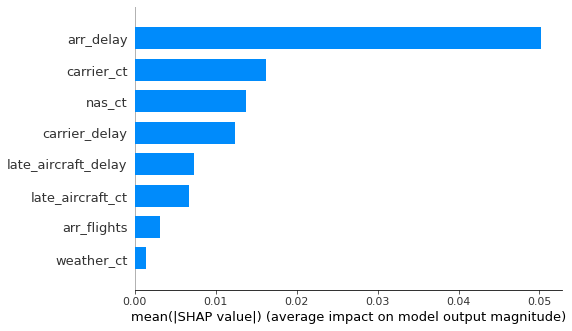

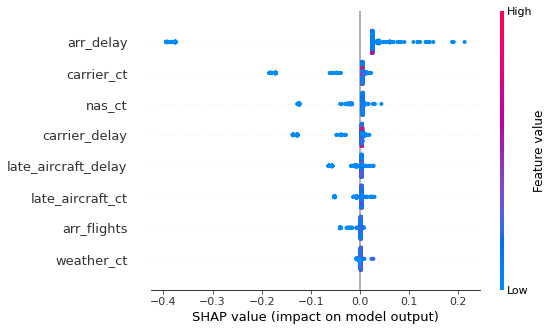

 SHAP force plot saved as 'shap_force_plot.html'. Open in browser to view.


In [29]:
# ==========================================
# ⚠️ SHAP on Large Dataset (VS Code Safe)
# ✅ Saves force plot to HTML (since VS Code can't render it)
# ==========================================

import shap
import numpy as np
import matplotlib.pyplot as plt

# STEP 1: Sample the test set to reduce memory usage
sample_size = 1000  # ⚠️ Tune up/down if memory allows
X_sample = X_test_scaled[:sample_size]
X_sample_original = X_test.reset_index(drop=True).iloc[:sample_size]

# STEP 2: Create SHAP TreeExplainer (Random Forest is tree-based)
explainer = shap.TreeExplainer(test_results['Random Forest']['Model'])

# STEP 3: Compute SHAP values
shap_values = explainer.shap_values(X_sample)

# STEP 4: Summary Bar Plot – Feature importance
shap.summary_plot(shap_values[1], X_sample_original, plot_type="bar")

# STEP 5: Swarm Plot – Individual SHAP values per feature
shap.summary_plot(shap_values[1], X_sample_original)

# STEP 6: Force Plot – Save to HTML (for first prediction)
force_plot = shap.force_plot(
    explainer.expected_value[1],
    shap_values[1][0],
    X_sample_original.iloc[0],
    matplotlib=False  # Do not use matplotlib backend in VS Code
)

# Export the force plot as an HTML file
with open("shap_force_plot.html", "w") as f:
    f.write(shap.getjs())  # Include JS
    f.write(force_plot.html())  # Write plot HTML

print(" SHAP force plot saved as 'shap_force_plot.html'. Open in browser to view.")
